In [1]:
# Playground
import numpy as np

a = np.array([1,2,3,4,5,12,23,34,45,56, 3,2,2,2,3,4,6,7,8])
l = a.shape[0]

rm_mask = np.arange(l)

idarr = np.arange(10, 15)
idarr2 = np.arange(0, 3)

idarr_sum = np.concatenate([idarr, idarr2], axis = 0)

to_remove = [
    [0, 3],
    [10, 15],
    [17, 18]
]

all_list = []
for rm in to_remove:
    rm_arr = np.arange(rm[0], rm[1])
    all_list.append(rm_arr)
conc = np.concatenate(all_list, axis = 0)    

print('conc =', conc)

r = np.delete(rm_mask, conc)
print('r = ', r)

def leave_elements_idx(n, to_remove):
  all_list = []
  for rm in to_remove:
      rm_arr = np.arange(rm[0], rm[1])
      all_list.append(rm_arr)
  conc = np.concatenate(all_list, axis = 0)    
  return np.delete(np.arange(n), conc)

dd = leave_elements_idx(l, to_remove)
dd

conc = [ 0  1  2 10 11 12 13 14 17]
r =  [ 3  4  5  6  7  8  9 15 16 18]


array([ 3,  4,  5,  6,  7,  8,  9, 15, 16, 18])

In [2]:
import cv2
import argparse
import numpy as np
import time
import os
# import math
# from moviepy.editor import ImageSequenceClip
from sklearn.model_selection import train_test_split
from sdc_utils import bc_read_data, normalize, pump_image_data
from sdc_utils import extend_with_flipped
from sdc_utils import read_data_gen, read_image_gen, random_brightness, random_trans, random_image_transform
from sdc_utils import load_dataset, load_all_datasets, load_datasets
# from jerky_utils import remove_jerky_sections
from model import create_model, create_model_linear, create_model_conv
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from video import make_video

import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
%matplotlib inline


Using TensorFlow backend.


In [3]:
  dataset_path = '../../../sdc/behavioral-cloning/data'
  base_path = ''
  save_file = ''
  nb_epoch = 1
  batch_size = 20
  model_type = 'cnn5'
  restore_weights = ''
  validation_split = 0.05
  remove_jerky = True
  lr = 0.001
  resize_factor = 8
  flip_images = False
  flip_images_ratio = 0.3
  left_right_images = True
  crop_bottom = 0


X_data_files, y_data = load_dataset(dataset_path, remove_jerky = remove_jerky, left_right = left_right_images)

print('len X_data_files =', len(X_data_files))
print('len y_data =', len(y_data))

Remove jerky sections ...
dataset_name = data
Removed 33 frames from dataset data
len X_center_files = 8003
len X_left_files = 8003
len X_right_files = 8003
len X_data_files init = 8003
len y_left_data = 8003
len y_right_data = 8003
len X_data_files = 24009
len y_data = 24009
len X_data_files = 24009
len y_data = 24009
len X_data_files = 24009
len y_data = 24009


len = 52


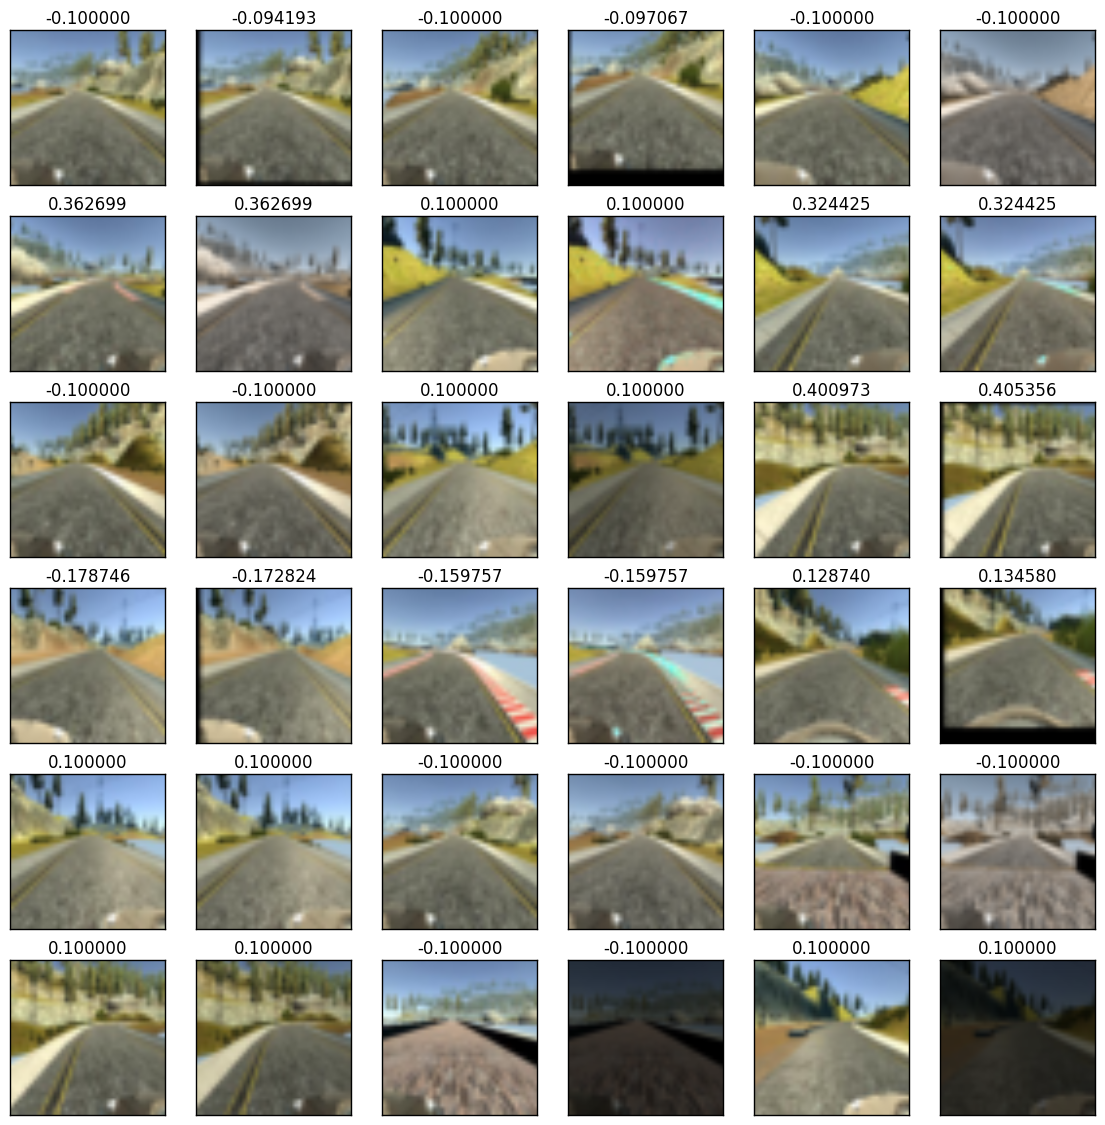

In [15]:
# Prepare data generateors
data_gen = read_data_gen(X_data_files, y_data, batch_size = batch_size)
image_gen = read_image_gen(data_gen, resize_factor, flip_images_ratio, crop_bottom = crop_bottom, augment = 1.0)

for X_img, y_img in image_gen:
    #     print('X_img =', X_img[0])
    #     print('y_img =', y_img[0])
    
    print('len =', len(X_img))
    
    plt.figure(figsize=(14,14))
    ii = 1
    for img, y in zip(X_img, y_img):
        plt.subplot(6, 6, ii)
        ii += 1
        
        cur_axes = plt.gca()
        cur_axes.axes.get_xaxis().set_ticks([])
        cur_axes.axes.get_yaxis().set_ticks([])
#         plt.figure(figsize=(5,5))
#         fig, ax = plt.subplots()
#         im = ax.imshow(img, cmap='rgb'
#                vmin=0, vmax=1)
#         fig.colorbar(im)
#         plt.show()
        
        
        #         im = 
        #         im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
#         img = random_brightness(img)
#         img, y_n = random_trans(img, y, 20)
        
        plt.imshow(img)
#         plt.title('%f -> %f' % (y, y_n))
        plt.title('%f' % (y))
        if ii > 36: break
    break
